In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def kalman_filter(data):
    n = len(data)
    xhat = np.zeros(n)       # 滤波后的状态估计
    P = np.zeros(n)          # 滤波后的状态协方差矩阵
    xhatminus = np.zeros(n)  # 预测状态估计
    Pminus = np.zeros(n)     # 预测状态协方差矩阵
    K = np.zeros(n)          # 卡尔曼增益
    Q = 1e-5                 # 状态转移协方差矩阵
    R = 0.1                  # 观测噪声协方差矩阵

    xhat[0] = data[0]
    P[0] = 1.0

    for k in range(1, n):
        xhatminus[k] = xhat[k-1]
        Pminus[k] = P[k-1] + Q
        K[k] = Pminus[k] / (Pminus[k] + R)
        xhat[k] = xhatminus[k] + K[k] * (data[k] - xhatminus[k])
        P[k] = (1 - K[k]) * Pminus[k]

    return xhat


In [4]:

data = pd.DataFrame(np.random.randn(100), columns=['value'])
print("Source Data:", data)
filtered_data = kalman_filter(data['value'].values)
print("Filtered Data:", filtered_data)


Source Data:        value
0   1.405542
1   0.000545
2   0.340565
3   1.469934
4  -1.336697
..       ...
95  0.365820
96 -1.888544
97 -0.021568
98 -1.194152
99 -2.301179

[100 rows x 1 columns]
Filtered Data: [ 1.40554185  0.12827089  0.22936901  0.62962399  0.14985526  0.41858337
  0.2376845   0.18330412  0.19024446 -0.00415918  0.03371349  0.05197151
  0.01984103 -0.0655413  -0.01022133  0.07863233  0.05878781  0.14147722
  0.08988066  0.03558417  0.01884097 -0.06136601 -0.07481708 -0.09522031
 -0.0590819   0.0054387   0.02053548 -0.02321277 -0.01428535 -0.01882757
  0.06045215  0.02448334  0.02081534  0.02958546  0.02419763  0.01924593
  0.02310004 -0.03362432 -0.04047937 -0.05514487 -0.05986496 -0.03577885
 -0.00954025 -0.01250229  0.02891094  0.04791727  0.0855387   0.0701936
  0.05618823  0.11291664  0.11848982  0.08825372  0.06620257  0.06829743
  0.09955256  0.12995163  0.14029596  0.14648414  0.14549721  0.12949438
  0.10669206  0.11224912  0.09785043  0.09539033  0.11728878  0

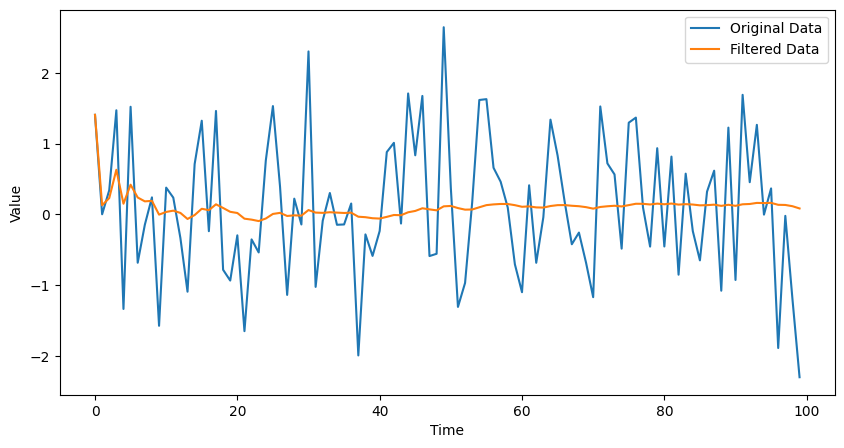

In [5]:

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(data.index, data['value'], label='Original Data')
ax.plot(data.index, filtered_data, label='Filtered Data')
ax.set_xlabel('Time')
ax.set_ylabel('Value')
ax.legend()
plt.show()